## Data Preparation

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [11]:
# Import Data

dataset = pd.read_excel('.../online_retail_II.xlsx')

# Inspect Data
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [12]:
# Clean Data

dataset = dataset[dataset['Quantity'] > 0]
dataset = dataset[~dataset['Invoice'].str.contains('C', na=False)]
dataset = dataset.dropna(subset=['Customer ID'])

In [13]:
# Adding Monetary Value

dataset['TotalPrice'] = dataset['Quantity'] * dataset['Price']


In [14]:
# Checking to see that TotalPrice was added
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


## RFM Analysis

RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important for marketing campaigns, customer engagement, and overall business strategy. 

### a. Calculate Recency, Frequency, Monetary
* Recency: How recently did the customer make a purchase? Recent customers are more likely to respond positively to promotions. If someone hasn’t purchased for a while, they may have churned or become inactive.


* Frequency: How often do they purchase? Customers who buy often are more engaged, and probably more loyal, than customers who rarely buy. They could be your regulars or account for a consistent stream of revenue.


* Monetary Value: How much do they spend? High monetary value means higher revenue from that customer. It might indicate a willingness to spend, or it might mean they find a lot of value in your service or product.

In [24]:
import datetime as dt
now = dt.datetime(2011, 12, 10)
rfm = dataset.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'Invoice': 'count',
    'TotalPrice': 'sum'})
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'Invoice': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)



### Why it is relevant


* Customer Engagement: Knowing who your recent customers are, or who spends the most, can help in tailoring engagement strategies.



* Personalization: You can provide personalized offers to different segments. For instance, you might give your high-frequency customers loyalty rewards.



* Resource Allocation: It helps in focusing on high-value customers rather than spending equally across all customers.



* Churn Prediction: By monitoring recency, you can predict which customers are at risk of churning.



* Improving Customer Lifetime Value: By understanding and acting on these segments, you can move customers up the value chain.

In [33]:
# Inspection
rfm

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,529,33,372.86,1
12347.0,367,71,1323.32,0
12348.0,438,20,222.16,0
12349.0,407,102,2671.14,0
12351.0,375,21,300.93,0
...,...,...,...,...
18283.0,382,230,641.77,0
18284.0,431,28,461.68,0
18285.0,660,12,427.00,1


## K-means Clustering

K-means Clustering is an unsupervised machine learning algorithm used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. It aims to minimize the within-cluster variances and maximize between-cluster variances.

### Feature Scaling
* Scale the RFM data to bring all features to the same scale.

In [26]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


### Determine Number of Clusters (k)

Use the Elbow Method to find the optimal number of clusters.

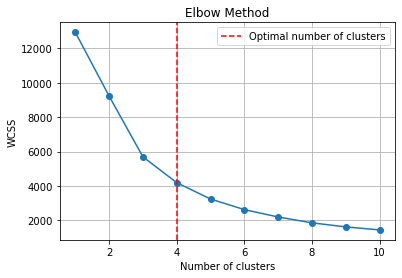

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=4, color='red', linestyle='--', label='Optimal number of clusters')
plt.legend()
plt.grid()
plt.show()



### Fit K-means Model
Fit the K-means model with the optimal number of clusters determined.

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = clusters


### Analyze and Visualize the Segments

Summary Statistics by Cluster

In [37]:
print(rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
}).reset_index())

  Cluster     Recency               Frequency                    Monetary  \
                 mean        std         mean          std           mean   
0       0  406.918877  35.219958   100.436151   121.080902    1952.065722   
1       1  607.699904  65.735183    29.742090    35.886626     612.538920   
2       2  379.880000  33.055912  1617.640000  1022.110394   36730.118000   
3       3  368.750000   4.500000  2654.750000  2112.361928  236568.790000   

                 
            std  
0   3646.851188  
1   1617.323960  
2  30937.096516  
3  84744.245126  


In [38]:
print(rfm['Cluster'].value_counts())


0    3242
1    1043
2      25
3       4
Name: Cluster, dtype: int64


### Visualize the Clusters


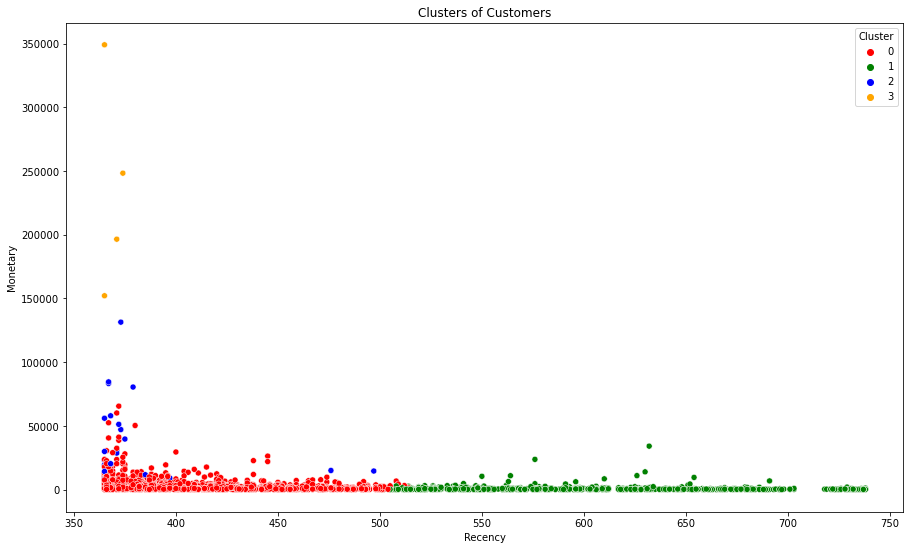

In [41]:
custom_palette = ['red', 'green', 'blue', 'orange'] # Add more colors if you have more clusters

plt.figure(figsize=(15, 9))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette=custom_palette)
plt.title('Clusters of Customers')
plt.show()



### Summarizing Cluster Characteristics
Usually, we can analyze the clusters by observing the average Recency, Frequency, and Monetary values
of the members of each cluster.



In [43]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean'],
    'Frequency': ['mean'],
    'Monetary': ['mean', 'count']
}).reset_index()

print(cluster_summary)

  Cluster     Recency    Frequency       Monetary      
                 mean         mean           mean count
0       0  406.918877   100.436151    1952.065722  3242
1       1  607.699904    29.742090     612.538920  1043
2       2  379.880000  1617.640000   36730.118000    25
3       3  368.750000  2654.750000  236568.790000     4


### Interpreting the clusters
What observations can be made based on the summary statistics of each cluster?

- Frequency refers to how often a customer makes a purchase or interacts with the business over a certain         period of time.


- Low Frequency means that the customer has made purchases or interacted with the business relatively             infrequently compared to other customers. This could be an indication that the customer is not highly           engaged, or that they only need the product or service occasionally.


- In customer segmentation, low recency is often seen as a positive indicator because it suggests that the       customer is currently active and engaged with the business. These customers might be more receptive to new     offers, promotions, or products since they have recently shown interest in the business. 

- Based on the interpretation of the clusters, we can suggest marketing strategies for each segment  


- For example, a cluster of Customers with high Monetary values are likely to be loyal or heavy users of the     products or services, and might respond more to exclusive offers or loyalty programs.




In [44]:
print("\nSuggested Strategies:\n")

for index, row in cluster_summary.iterrows():
    recency = row[('Recency', 'mean')]
    frequency = row[('Frequency', 'mean')]
    monetary = row[('Monetary', 'mean')]
    count = row[('Monetary', 'count')]
    
    print(f"Cluster {row['Cluster']} (Count: {count}):")
    
    # High-Value Active Customers
    if monetary > cluster_summary[('Monetary', 'mean')].mean() and recency < cluster_summary[('Recency', 'mean')].mean():
        print("    Strategy: Offer exclusive deals and loyalty programs for these high-value active customers.")
        
    # Churning High-Value Customers
    elif monetary > cluster_summary[('Monetary', 'mean')].mean() and recency > cluster_summary[('Recency', 'mean')].mean():
        print("    Strategy: Re-engage with personalized offers and understand the reasons for decreased activity.")
    
    # Regular Active Customers
    elif monetary <= cluster_summary[('Monetary', 'mean')].mean() and recency < cluster_summary[('Recency', 'mean')].mean():
        print("    Strategy: Encourage them to buy more often through promotions or bundling.")
    
    # Low-Value Inactive Customers
    else:
        print("    Strategy: Send occasional promotions but focus resources mainly on other segments.")
    
    print()



Suggested Strategies:

Cluster     0.0
Name: 0, dtype: float64 (Count: 3242.0):
    Strategy: Encourage them to buy more often through promotions or bundling.

Cluster     1.0
Name: 1, dtype: float64 (Count: 1043.0):
    Strategy: Send occasional promotions but focus resources mainly on other segments.

Cluster     2.0
Name: 2, dtype: float64 (Count: 25.0):
    Strategy: Encourage them to buy more often through promotions or bundling.

Cluster     3.0
Name: 3, dtype: float64 (Count: 4.0):
    Strategy: Offer exclusive deals and loyalty programs for these high-value active customers.

